# Draco Debugging

In [5]:
import toml
import numpy as np
import matplotlib.pyplot as plt

from draco import Draco

In [6]:
default_draco = Draco()

In [7]:
chart_preferences = {}
feature_matrix = []

with open("./data/example_charts.toml") as file:
    example_specs = toml.load(file)

    for chart in example_specs:
        chart_preferences[chart] = default_draco.count_preferences(example_specs[chart])

feature_names = default_draco.soft_constraint_names
chart_names = chart_preferences.keys()

for chart in chart_names:
    temp = []

    for feature in feature_names:
        if feature in chart_preferences[chart]:
            temp.append(chart_preferences[chart][feature])
        else:
            temp.append(0)
    feature_matrix.append(temp)

# print (feature_matrix)

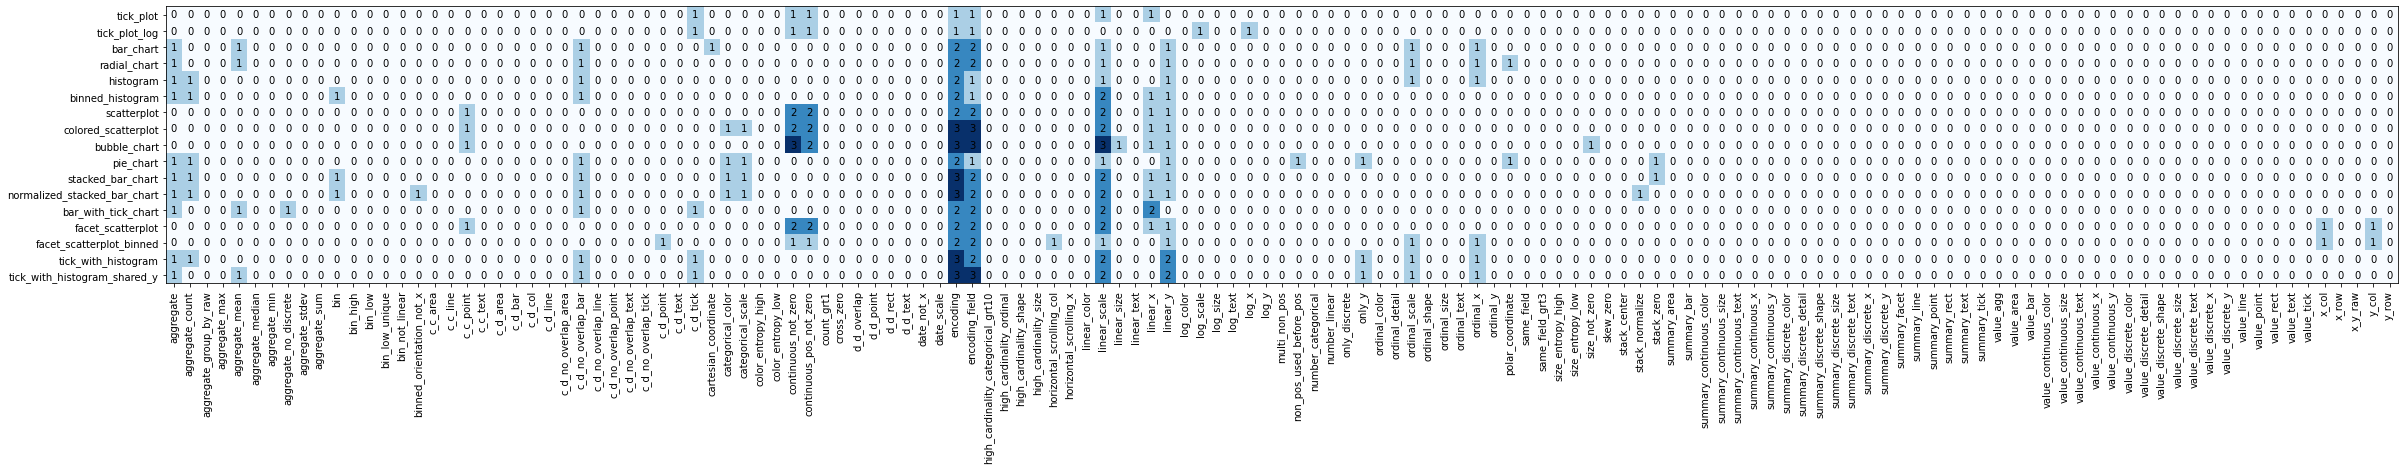

In [8]:
fig, ax = plt.subplots()

ax.matshow(feature_matrix, cmap=plt.cm.Blues)
plt.gca().xaxis.tick_bottom()

for i in range(len(chart_names)):
    for j in range(len(feature_names)):
        c = feature_matrix[i][j]
        ax.text(j, i, str(c), va="center", ha="center")

x_positions = list(range(len(feature_names)))
ax.xaxis.set_ticks(x_positions)
ax.xaxis.set_ticklabels(feature_names)
plt.xticks(rotation=90)

y_positions = list(range(len(chart_names)))
ax.yaxis.set_ticks(y_positions)
ax.yaxis.set_ticklabels(chart_names)

fig.set_size_inches(40, 30)